In [44]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import math
import seaborn as sns
from scipy import stats as st

In [45]:
games_df = pd.read_csv('games.csv')

In [61]:
for column in games_df.columns:
        games_df.rename(columns={column: column.strip()}, inplace=True)

games_df.columns = games_df.columns.str.lower()
games_df.info()
print(games_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  sales_per_game   16715 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB
                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES    

In [47]:
games_df['name'] = games_df['name'].fillna('unknown')
print(games_df['name'].value_counts())
need_for_speed = games_df[games_df['name'] == 'Need for Speed: Most Wanted']
print(need_for_speed)

name
Need for Speed: Most Wanted                         12
Madden NFL 07                                        9
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11560, dtype: int64
                              name platform  year_of_release   genre  \
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0 

- Rellene los pocos valores ausentes con unknown ya que creo, no podemos adquirir mas informacion al respecto.
- Los valores duplicados de la columna name se deben a que son titulos que se publicaron en distintas plataformas en diferentes años.

- La columna platform no tiene ningun problema.

In [48]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(games_df['year_of_release'].mean())
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

- Cambie el tipo de dato a int ya que me parece mas logico que un año sea un entero o un object.
- Escogi rellenar los valores ausentes con la media de la columna ya que considero que esta es la opcion que mas probabilidad de ocurrir y no es necesario usar una mediana. 

In [49]:
games_df['genre'] = games_df['genre'].fillna('unknown')

- La columna genre solo tienen dos valores ausentes, estos fueron remplazados por unknown ya que no podemos obtener mas informacion al respecto.

- Las columnas na_sales, eu_sales, jp_sales y other_sales no tiene nigun problema.

In [50]:
games_df['critic_score'] = games_df['critic_score'].fillna(games_df['critic_score'].mean())
np.array_equal(games_df['critic_score'], games_df['critic_score'].astype(int))
games_df['critic_score'] = games_df['critic_score'].astype(int)

- Rellene los valores ausentes con mean ya que me parece que es el score que mas probabilidad tiene de ser dado.
- Comprobe que todos los valores de la columna fueran enteros para despues concluir que no se perdia ninguna infimacion si convertia la columna a int.

In [51]:
games_df['user_score'] = games_df['user_score'].fillna(0)
games_df['user_score'] = games_df['user_score'].replace('tbd', 0)
games_df['user_score'] = games_df['user_score'].astype(float)
games_df['user_score'] = games_df['user_score'].fillna(games_df['user_score'].mean())

- La columna user_score debe ser un float debido a que sus valores son decimales y puede que en algun momento querramos trabajar con ello como un numero y no como un object(su tipo original)
- He decidido remplazar los valores ausentes y los 'tbd' por un 0, ya que coinsidero que es lo unico que se puede hacer para que estos valores no interfieran en el analisis, esto seguira asi al menos hasta que se determine cual es el score verdadero. 

In [52]:
games_df['rating'] = games_df['rating'].fillna('unknown')

- El unico problema de esta columna son los valores ausentes, y coinsidero que la unica forma de solucionarlo es poner otro str que represente que el valor es desconocido.

In [53]:
games_df['sales_per_game'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].apply(sum, axis=1)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  sales_per_game   16715 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


<Axes: title={'center': 'Games per year'}, xlabel='Year', ylabel='Games'>

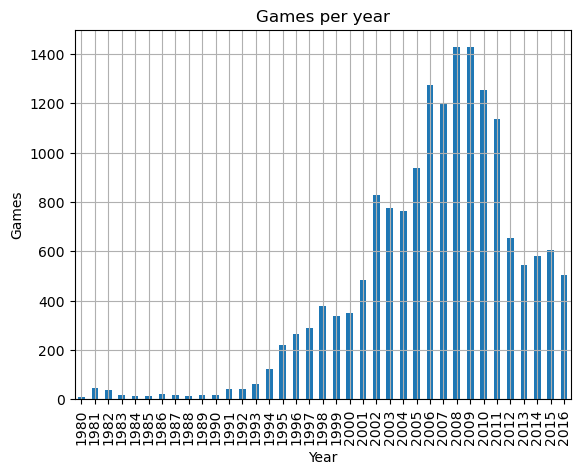

In [54]:
games_per_year = games_df.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', title = 'Games per year', xlabel='Year', ylabel='Games', grid=True)

- Se ve claramente que a aumentado la cantidad de juegos producidos por año. Sin embargo, si dividimos la grafica por decadas podemos ver que a partir del 2010 esta tendencia a dejado de existir. Esto se puede deber a que el mercado de videojuegos ya esta "establecido" o por la complejidad de los juegos que va aumentando.
- El periodo con mas videojuegos a sido del 2000 al 2010.

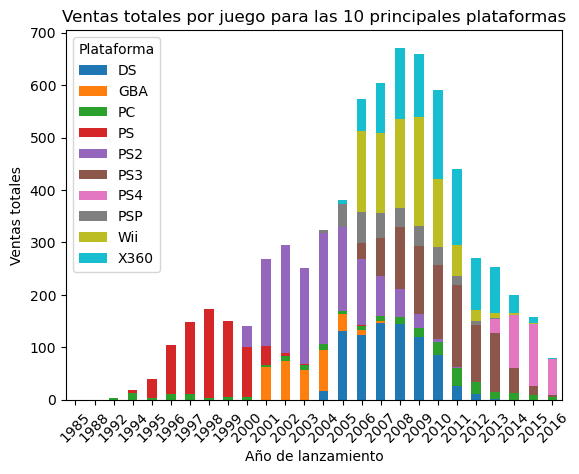

In [55]:
platforms_sales = games_df.groupby('platform')['sales_per_game'].sum()
top_platforms = platforms_sales.sort_values(ascending=False).head(10)
top_platforms_names = top_platforms.index
top_platforms_data = games_df[games_df['platform'].isin(top_platforms_names)]
sales_by_year_platform = top_platforms_data.groupby(['year_of_release', 'platform'])['sales_per_game'].sum().unstack()

sales_by_year_platform.plot(kind='bar', stacked=True)
plt.title('Ventas totales por juego para las 10 principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.show()

- Cada plataforma dura aproximadamente 10 años en aparecer y desaparecer del mercado. Dentre de esta decada las plataformas duran mas o menos 5 años en llegar a su mejor punto en terminos de ventas y 5 mas en "desaparecer" del top 10 del mercado.

- Vamos a filtrar los datos para fijarnos solo en el periodo de tiempo del 2006 en adelante ya que estos son los años mas importantes para entender la industria en los ultimos año. Todo esto para construir el modelo mas aproximado de como va a funcionar el mercado en 2017.

In [56]:
games_relevant_years = games_df[games_df['year_of_release'] > 2006]
top_games_relevant_years = games_relevant_years[games_relevant_years['platform'].isin(top_platforms_names)]

- Coinsidero que las apuestas mas seguras son Xbox, playstation y nintendo. En primer lugar playstation es una plataforma que se ha mantenido durante varias ediciones en las mejores del mercado, y ahora que la play 4 salio hace relativamente poco, todos los usuarios que vienen de la play 3 muy probablemente migren a la nueva consola, lo que le asegura un gran exito. Por otro lado tenemos a xbox que durante 11 años incluyendo el 2016 fue la plataforma con mas ventas de todas, teniendo esto en cuenta lo mas probable es que se mantenga muy cerca del top 3 plataformas durante el siguiente año. Luego tenemos la wii, esta plataforma ha decaido bastante respecto a sus anteriores años, sin embargo, nintendo como compañia lleva muchos años teniendo una consola compitiendo por los primeros puestos, asi que lo mas seguro es que est ase mantengo fuerte en el mercado los siguientes años.

ps4 critic score correlation: 0.3527177426809977
ps4 user score correlation: 0.11311562450852881


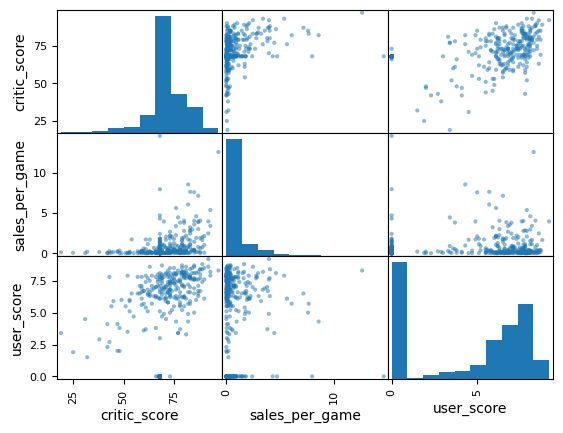

In [57]:
ps4 = games_df[games_df['platform'] == 'PS4']
ps4_data = ps4[['critic_score', 'sales_per_game', 'user_score']]
pd.plotting.scatter_matrix(ps4_data)
print(f'ps4 critic score correlation: {ps4_data['critic_score'].corr(ps4_data['sales_per_game'])}')
print(f'ps4 user score correlation: {ps4_data['user_score'].corr(ps4_data['sales_per_game'])}')

- Si solo no fijamos en la ps4, nos podemos dar cuenta de que la critica y las ventas no estan muy relacionadas, especialmente si nos fijamos solo en la critica de los usuarios, porque al parecer los usuarios le hacen mas caso a la critica profecional. 

xbox critic score correlation: 0.38092894552255796
xbox user score correlation: 0.20890007894358806
wii critic score correlation:0.1323481842757834
wii user score correlation:0.18613675964673143


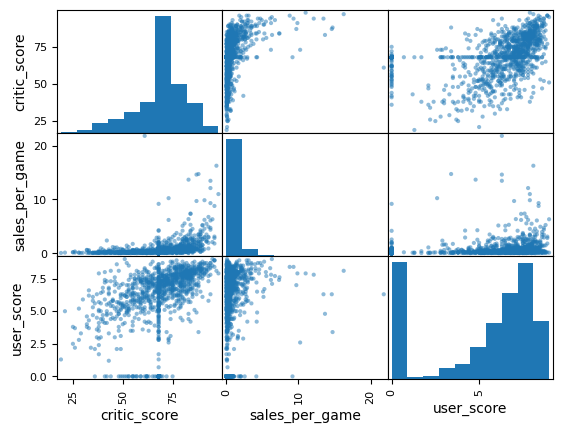

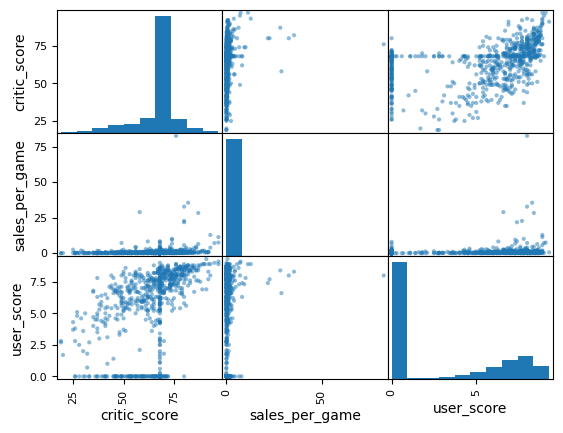

In [58]:
xbox = games_df[games_df['platform'] == 'X360']
xbox_data = xbox[['critic_score', 'sales_per_game', 'user_score']]
pd.plotting.scatter_matrix(xbox_data)
print(f"xbox critic score correlation: {xbox_data['critic_score'].corr(xbox_data['sales_per_game'])}")
print(f"xbox user score correlation: {xbox_data['user_score'].corr(xbox_data['sales_per_game'])}")
wii = games_df[games_df['platform'] == 'Wii']
wii_data = wii[['critic_score', 'sales_per_game', 'user_score']]
pd.plotting.scatter_matrix(wii_data)
print(f"wii critic score correlation:{wii_data['critic_score'].corr(wii_data['sales_per_game'])}")
print(f"wii user score correlation:{wii_data['user_score'].corr(wii_data['sales_per_game'])}")

- Al parecer los usuarios usualmente no le hacen mucho caso a la critica a la hora de comprar videojuegos sin importar de que plataforma sean.

In [59]:
print(games_df['genre'].value_counts())

top_6_genres = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure']
top_6_to_12_genres = ['Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
top_6_genres_data = games_df[games_df['genre'].isin(top_6_genres)]
top_6_to_12_genres_data = games_df[games_df['genre'].isin(top_6_to_12_genres)]
top_6_genres_sales = top_6_genres_data['sales_per_game'].sum()
top_6_to_12_genres_sales = top_6_to_12_genres_data['sales_per_game'].sum()
print(top_6_genres_sales)
print(top_6_to_12_genres_sales)

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
unknown            2
Name: count, dtype: int64
6102.55
2810.7400000000002


- A pesar de que cada genero tiene su comunidad podemos ver claramente que los ultimos 6 o 5 generos tienen muchas menos compras. Esto se puede deber a que generos de video juegos como el de estrategia pueden llegar a ser muy complejos y demandantes, lo que puede hacer que no sean del agrado de muchas personas. Esto se evidencia en el numero de juegos que se venden, a pesar de esto, la diferencia en dinero no es tanta, ya que los juegos que son tan grandes y complejos suelen costar mas dinero a pesar de no ser tan conosidos. 

In [63]:
jp_user = games_df[['jp_sales', 'platform', 'rating']]
top_5_platforms_jp = jp_user.groupby('platform')['jp_sales'].sum().nlargest(5)
print(top_5_platforms_jp)
na_user = games_df[['na_sales', 'platform', 'rating']]
top_5_platforms_na = na_user.groupby('platform')['na_sales'].sum().nlargest(5)
print(top_5_platforms_na)
eu_user = games_df[['eu_sales', 'platform', 'rating']]
top_5_platforms_eu = eu_user.groupby('platform')['eu_sales'].sum().nlargest(5)
print(top_5_platforms_eu)

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


- Sony como compañia tiene una de las cuotas de mercado mas grandes en cada una de las tres regiones. Se podria decir que es la unica compañia que tiene una cuota de mercado grande en cada region independientemente de que no se haya originado ahi. En los demas casos las plataformas que mas dominan el mercado suelen ser de compañias locales, como por ejemplo x360 en na o ds en jp. 

In [64]:
sales_per_esrb_jp = jp_user.groupby('rating')['jp_sales'].sum()
print(sales_per_esrb_jp)
sales_per_esrb_eu = eu_user.groupby('rating')['eu_sales'].sum()
print(sales_per_esrb_eu)
sales_per_esrb_na = na_user.groupby('rating')['na_sales'].sum()
print(sales_per_esrb_na)

rating
AO           0.00
E          198.11
E10+        40.20
EC           0.00
K-A          1.46
M           64.24
RP           0.00
T          151.40
unknown    841.96
Name: jp_sales, dtype: float64
rating
AO           0.61
E          710.25
E10+       188.52
EC           0.11
K-A          0.27
M          483.97
RP           0.08
T          427.03
unknown    613.83
Name: eu_sales, dtype: float64
rating
AO            1.26
E          1292.99
E10+        353.32
EC            1.53
K-A           2.56
M           748.48
RP            0.00
T           759.75
unknown    1242.46
Name: na_sales, dtype: float64


- Claramente los mas vendidos en cada region son los E, ya que son juegos para todo publico y ademas son de los que mas se producen. Los unicos que le compiten a esta categoria son los que aun no han sido siquiera encontrados por esrb, ya que estos son la suma de muchos juegos de muchas categorias aun sin encontrar, lo que no significa que no se vendan.
- A pesar de que en cada region es distinta la produccion de videojuegos en todas se produce un patron sobre cuales categorias se venden mas y cuales menos, las siguentes categorias mas vendidas son T y M ya que estas estan dirigidas a la poblacion que mas juega video juegos como lo son los jovenes y adolecentes.
- Las categorias EC O K-A son de las menos vendidas, K-A significa kids to adults, esta es la misma categoria E pero solo fue utilizada hasta 1998 por lo que no tiene muchas ventas registradas. Y EC es early childhood lo que significa que va dirigida a una poblacion que no juega casi ningun videojuego.
- Las categorias RP y AO son las menos vendidas ya que no hay muchos videojuegos encontrados que no se hayan calificado y porque no hay muchos videojuegos categorizados como AO ya que la mayoria de juegos con un contenido delicado estan en M, por lo que el juego tiene que tener un contenido muy explicito para poder entrar en AO lo que hace que no tenga muchas ventas.
- En sintesis, el rating de esrb afecta las ventas de cada region por igual.  